### Heart_rate_detection_from_bed-embedded_Ballistocardiogram_sensors

***Importing Important libiraries***


In [54]:
import pandas as pd
import numpy as np
import csv
from datetime import datetime


**First, we need to generate a new dataframe for the BCG file sample with the generated timestamps**

In [55]:
import pandas as pd

def add_timestamps_to_bcg(input_csv, output_csv):
    # Read the input CSV file into a DataFrame
    df = pd.read_csv(input_csv)
    
    # Check if the first row has valid Timestamp and fs
    if pd.isna(df.at[0, 'Timestamp']) or pd.isna(df.at[0, 'fs']):
        raise ValueError("The first row must contain valid Timestamp and fs values.")
    
    # Extract initial timestamp and sampling frequency
    initial_ts = int(df.at[0, 'Timestamp'])
    fs = int(df.at[0, 'fs'])
    interval = int(1000 / fs)  # Interval in milliseconds
    
    # Iterate through each row to fill missing Timestamps and fs
    for idx in df.index:
        if pd.isna(df.at[idx, 'Timestamp']):
            # Calculate the new timestamp and ensure it's not a float by rounding or converting
            new_ts = initial_ts + idx * interval
            # If the initial timestamp is in scientific notation, keep it as is
            if 'E' in str(initial_ts):
                df.at[idx, 'Timestamp'] = new_ts
            else:
                df.at[idx, 'Timestamp'] = int(round(new_ts))
            # Fill the fs value from the initial
            df.at[idx, 'fs'] = fs
    
    # Save the processed DataFrame to the output CSV file
    df.to_csv(output_csv, index=False)
    print(f"Processed data saved to {output_csv}")

In [ ]:
# Example usage:
input_csv = r"/home/rabieash/projects/data_project/data/data/03/BCG/03_20231105_BCG.csv"
output_csv = "bcg_data_with_timestamps.csv"
add_timestamps_to_bcg(input_csv, output_csv)

Processed data saved to bcg_data_with_timestamps.csv


In [58]:
# Read the files
bcg_df = pd.read_csv("bcg_data_with_timestamps.csv")
hr_df = pd.read_csv(r"/home/rabieash/projects/data_project/data/data/03/Reference/RR/03_20231105_RR.csv")
hr_df.head


<bound method NDFrame.head of                Timestamp  Heart Rate  RR Interval in seconds
0      2023/11/5 0:03:48          84                   0.813
1      2023/11/5 0:03:49          83                   0.876
2      2023/11/5 0:03:50          81                   0.745
3      2023/11/5 0:03:50          81                   0.706
4      2023/11/5 0:03:51          81                   0.722
...                  ...         ...                     ...
35595  2023/11/5 9:29:28         101                   4.077
35596  2023/11/5 9:29:28         101                   0.416
35597  2023/11/5 9:29:29         102                   1.864
35598  2023/11/5 9:29:33         102                   0.781
35599  2023/11/5 9:29:33         102                   4.423

[35600 rows x 3 columns]>

**Converting the BCG timestamp to human-readable format to be easy to compare it with RR**

In [59]:
# Convert BCG timestamp to human-readable format
bcg_df['human_readable_timestamp'] = pd.to_datetime(bcg_df['Timestamp'], unit='ms')
bcg_df['human_readable_timestamp'] = bcg_df['human_readable_timestamp'].dt.strftime('%Y/%m/%d %H:%M:%S.%f').str[:-3]

# Display the first few rows to verify the conversion
print("\nFirst few rows of BCG data with human-readable timestamps:")
print(bcg_df[['BCG', 'human_readable_timestamp', 'fs']].head())

# Save the updated dataframe if needed
#bcg_df.to_csv("bcg_data_with_human_readable_timestamps.csv", index=False)


First few rows of BCG data with human-readable timestamps:
   BCG human_readable_timestamp     fs
0  -40  2023/11/04 15:47:49.870  140.0
1  -41  2023/11/04 15:47:49.877  140.0
2  -36  2023/11/04 15:47:49.884  140.0
3  -44  2023/11/04 15:47:49.891  140.0
4  -41  2023/11/04 15:47:49.898  140.0


In [60]:
bcg_df.head(-5)

,BCG,Timestamp,fs,human_readable_timestamp
0,-40,1.699113e+12,140.0,2023/11/04 15:47:49.870
1,-41,1.699113e+12,140.0,2023/11/04 15:47:49.877
2,-36,1.699113e+12,140.0,2023/11/04 15:47:49.884
3,-44,1.699113e+12,140.0,2023/11/04 15:47:49.891
4,-41,1.699113e+12,140.0,2023/11/04 15:47:49.898
...,...,...,...,...
4890301,-201,1.699147e+12,140.0,2023/11/05 01:18:21.977
4890302,-207,1.699147e+12,140.0,2023/11/05 01:18:21.984
4890303,-206,1.699147e+12,140.0,2023/11/05 01:18:21.991
4890304,-204,1.699147e+12,140.0,2023/11/05 01:18:21.998


In [61]:
bcg_df.head(-5)

,BCG,Timestamp,fs,human_readable_timestamp
0,-40,1.699113e+12,140.0,2023/11/04 15:47:49.870
1,-41,1.699113e+12,140.0,2023/11/04 15:47:49.877
2,-36,1.699113e+12,140.0,2023/11/04 15:47:49.884
3,-44,1.699113e+12,140.0,2023/11/04 15:47:49.891
4,-41,1.699113e+12,140.0,2023/11/04 15:47:49.898
...,...,...,...,...
4890301,-201,1.699147e+12,140.0,2023/11/05 01:18:21.977
4890302,-207,1.699147e+12,140.0,2023/11/05 01:18:21.984
4890303,-206,1.699147e+12,140.0,2023/11/05 01:18:21.991
4890304,-204,1.699147e+12,140.0,2023/11/05 01:18:21.998


In [62]:
hr_df.head(-5)

,Timestamp,Heart Rate,RR Interval in seconds
0,2023/11/5 0:03:48,84,0.813
1,2023/11/5 0:03:49,83,0.876
2,2023/11/5 0:03:50,81,0.745
3,2023/11/5 0:03:50,81,0.706
4,2023/11/5 0:03:51,81,0.722
...,...,...,...
35590,2023/11/5 9:29:18,95,0.574
35591,2023/11/5 9:29:19,98,0.579
35592,2023/11/5 9:29:19,98,0.575
35593,2023/11/5 9:29:21,99,0.937


In [63]:
bcg_df.head(-5)


,BCG,Timestamp,fs,human_readable_timestamp
0,-40,1.699113e+12,140.0,2023/11/04 15:47:49.870
1,-41,1.699113e+12,140.0,2023/11/04 15:47:49.877
2,-36,1.699113e+12,140.0,2023/11/04 15:47:49.884
3,-44,1.699113e+12,140.0,2023/11/04 15:47:49.891
4,-41,1.699113e+12,140.0,2023/11/04 15:47:49.898
...,...,...,...,...
4890301,-201,1.699147e+12,140.0,2023/11/05 01:18:21.977
4890302,-207,1.699147e+12,140.0,2023/11/05 01:18:21.984
4890303,-206,1.699147e+12,140.0,2023/11/05 01:18:21.991
4890304,-204,1.699147e+12,140.0,2023/11/05 01:18:21.998


In [64]:
hr_df.head(-5)


,Timestamp,Heart Rate,RR Interval in seconds
0,2023/11/5 0:03:48,84,0.813
1,2023/11/5 0:03:49,83,0.876
2,2023/11/5 0:03:50,81,0.745
3,2023/11/5 0:03:50,81,0.706
4,2023/11/5 0:03:51,81,0.722
...,...,...,...
35590,2023/11/5 9:29:18,95,0.574
35591,2023/11/5 9:29:19,98,0.579
35592,2023/11/5 9:29:19,98,0.575
35593,2023/11/5 9:29:21,99,0.937


**Comparing between BCG and RR times to be ready to sync them**

In [65]:
# Convert timestamps to datetime for comparison
bcg_start = pd.to_datetime(bcg_df['human_readable_timestamp'].iloc[0])
bcg_end = pd.to_datetime(bcg_df['human_readable_timestamp'].iloc[-1])
hr_start = pd.to_datetime(hr_df['Timestamp'].iloc[0])
hr_end = pd.to_datetime(hr_df['Timestamp'].iloc[-1])

print("BCG Data:")
print(f"Start time: {bcg_start}")
print(f"End time: {bcg_end}")
print("\nHeart Rate Data:")
print(f"Start time: {hr_start}")
print(f"End time: {hr_end}")

# Determine which dataset starts later and ends earlier
if bcg_start > hr_start:
    print("\nBCG data starts later than Heart Rate data")
else:
    print("\nHeart Rate data starts later than BCG data")

if bcg_end < hr_end:
    print("BCG data ends earlier than Heart Rate data")
else:
    print("Heart Rate data ends earlier than BCG data")

# Calculate the overlap period
overlap_start = max(bcg_start, hr_start)
overlap_end = min(bcg_end, hr_end)
print(f"\nOverlap period:")
print(f"Start: {overlap_start}")
print(f"End: {overlap_end}")

BCG Data:
Start time: 2023-11-04 15:47:49.870000
End time: 2023-11-05 01:18:22.040000

Heart Rate Data:
Start time: 2023-11-05 00:03:48
End time: 2023-11-05 09:29:33

Heart Rate data starts later than BCG data
BCG data ends earlier than Heart Rate data

Overlap period:
Start: 2023-11-05 00:03:48
End: 2023-11-05 01:18:22.040000


*Then, we will synchronize that datafarmes to the averlap period*

**Now, we will sync the timestamps of BCG and RR**

In [66]:
# Convert the timestamps to datetime (if not already)
bcg_df['human_readable_timestamp'] = pd.to_datetime(bcg_df['human_readable_timestamp'])
hr_df['Timestamp'] = pd.to_datetime(hr_df['Timestamp'])

# Extract only the time part (ignoring the date) from the timestamps
bcg_df['time'] = bcg_df['human_readable_timestamp'].dt.time
hr_df['time'] = hr_df['Timestamp'].dt.time

# Extract the time from the overlap period (ignoring the date)
overlap_start_time = overlap_start.time()
overlap_end_time = overlap_end.time()

# Filter both dataframes to only include data within the overlap period based on time
bcg_df_filtered = bcg_df[(bcg_df['time'] >= overlap_start_time) & 
                          (bcg_df['time'] <= overlap_end_time)]

hr_df_filtered = hr_df[(hr_df['time'] >= overlap_start_time) & 
                       (hr_df['time'] <= overlap_end_time)]

# Print the filtered dataframes
print("\nFiltered BCG Data (Time-based filtering):")
print(bcg_df_filtered.head())

print("\nFiltered Heart Rate Data (Time-based filtering):")
print(hr_df_filtered.head())



Filtered BCG Data (Time-based filtering):
         BCG     Timestamp     fs human_readable_timestamp             time
4251162  580  1.699143e+12  140.0  2023-11-05 00:03:48.004  00:03:48.004000
4251163  579  1.699143e+12  140.0  2023-11-05 00:03:48.011  00:03:48.011000
4251164  603  1.699143e+12  140.0  2023-11-05 00:03:48.018  00:03:48.018000
4251165  637  1.699143e+12  140.0  2023-11-05 00:03:48.025  00:03:48.025000
4251166  -94  1.699143e+12  140.0  2023-11-05 00:03:48.032  00:03:48.032000

Filtered Heart Rate Data (Time-based filtering):
            Timestamp  Heart Rate  RR Interval in seconds      time
0 2023-11-05 00:03:48          84                   0.813  00:03:48
1 2023-11-05 00:03:49          83                   0.876  00:03:49
2 2023-11-05 00:03:50          81                   0.745  00:03:50
3 2023-11-05 00:03:50          81                   0.706  00:03:50
4 2023-11-05 00:03:51          81                   0.722  00:03:51


In [67]:
# Print the filtered dataframes
print("\nFiltered BCG Data (Time-based filtering):")
print(bcg_df_filtered.head(-5))

print("\nFiltered Heart Rate Data (Time-based filtering):")
print(hr_df_filtered.head(-5))


Filtered BCG Data (Time-based filtering):
         BCG     Timestamp     fs human_readable_timestamp             time
4251162  580  1.699143e+12  140.0  2023-11-05 00:03:48.004  00:03:48.004000
4251163  579  1.699143e+12  140.0  2023-11-05 00:03:48.011  00:03:48.011000
4251164  603  1.699143e+12  140.0  2023-11-05 00:03:48.018  00:03:48.018000
4251165  637  1.699143e+12  140.0  2023-11-05 00:03:48.025  00:03:48.025000
4251166  -94  1.699143e+12  140.0  2023-11-05 00:03:48.032  00:03:48.032000
...      ...           ...    ...                      ...              ...
4890301 -201  1.699147e+12  140.0  2023-11-05 01:18:21.977  01:18:21.977000
4890302 -207  1.699147e+12  140.0  2023-11-05 01:18:21.984  01:18:21.984000
4890303 -206  1.699147e+12  140.0  2023-11-05 01:18:21.991  01:18:21.991000
4890304 -204  1.699147e+12  140.0  2023-11-05 01:18:21.998  01:18:21.998000
4890305 -208  1.699147e+12  140.0  2023-11-05 01:18:22.005  01:18:22.005000

[639144 rows x 5 columns]

Filtered Heart Ra

In [68]:
# Save the filtered dataframe
hr_df_filtered.to_csv("hr_data_filtered.csv", index=False)

In [69]:
bcg_df_filtered.head()

,BCG,Timestamp,fs,human_readable_timestamp,time
4251162,580,1.699143e+12,140.0,2023-11-05 00:03:48.004,00:03:48.004000
4251163,579,1.699143e+12,140.0,2023-11-05 00:03:48.011,00:03:48.011000
4251164,603,1.699143e+12,140.0,2023-11-05 00:03:48.018,00:03:48.018000
4251165,637,1.699143e+12,140.0,2023-11-05 00:03:48.025,00:03:48.025000
4251166,-94,1.699143e+12,140.0,2023-11-05 00:03:48.032,00:03:48.032000


**We need to change the fs from 140HZ to 50HZ, so we will resample the BCG file to 50HZ**

In [70]:
import numpy as np
import pandas as pd

# Get only numeric columns
numeric_cols = bcg_df_filtered.select_dtypes(include='number').columns

# Original and target sample rates
fs_original = 140
fs_target = 50

# Time vectors
t_original = np.arange(len(bcg_df_filtered)) / fs_original
t_target = np.arange(0, t_original[-1], 1/fs_target)

# Interpolate only numeric columns
bcg_df_resampled = pd.DataFrame({
    col: np.interp(t_target, t_original, bcg_df_filtered[col].values.astype(float))
    for col in numeric_cols
})




In [71]:
# Save the filtered dataframe
bcg_df_resampled.to_csv("bcg_df_resampled.csv", index=False)

In [72]:
print(len(bcg_df_resampled))

228268


In [73]:
print("Original duration (s):", len(bcg_df_filtered) / 140)
print("Expected resampled length:", len(bcg_df_filtered) / 140 * 50)
print("Actual resampled length:", len(bcg_df_resampled))


Original duration (s): 4565.35
Expected resampled length: 228267.50000000003
Actual resampled length: 228268


In [74]:
bcg_df_resampled.head()

,BCG,Timestamp,fs
0,580.0,1.699143e+12,140.0
1,630.2,1.699143e+12,140.0
2,-18.6,1.699143e+12,140.0
3,851.6,1.699143e+12,140.0
4,-116.0,1.699143e+12,140.0


**Importing another required libarries**

In [75]:
# Import required libraries
import math
import os

import numpy as np
import pandas as pd
from scipy.signal import savgol_filter

from band_pass_filtering import band_pass_filtering
from compute_vitals import vitals
from detect_apnea_events import apnea_events
from detect_body_movements import detect_patterns
from modwt_matlab_fft import modwt
from modwt_mra_matlab_fft import modwtmra
from remove_nonLinear_trend import remove_nonLinear_trend
from data_subplot import data_subplot

In [76]:
utc_time = bcg_df_resampled['Timestamp']
utc_time = utc_time.to_numpy()
data_stream = bcg_df_resampled['BCG']

start_point, end_point, window_shift, fs = 0, 500, 500, 50
# ==========================================================================================================
data_stream, utc_time, flags = detect_patterns(start_point, end_point, window_shift, data_stream, utc_time, plot=1)
# ==========================================================================================================
# BCG signal extraction
movement = band_pass_filtering(data_stream, fs, "bcg")
# ==========================================================================================================
# Respiratory signal extraction
breathing = band_pass_filtering(data_stream, fs, "breath")
breathing = remove_nonLinear_trend(breathing, 3)
breathing = savgol_filter(breathing, 11, 3)
# ==========================================================================================================
w = modwt(movement, 'bior3.9', 4)
dc = modwtmra(w, 'bior3.9')
wavelet_cycle = dc[4]
# ==========================================================================================================
# Vital Signs estimation - (10 seconds window is an optimal size for vital signs measurement)
t1, t2, window_length, window_shift = 0, 500, 500, 500
hop_size = math.floor((window_length - 1) / 2)
limit = int(math.floor(breathing.size / window_shift))
# ==========================================================================================================
# Heart Rate
#beats = vitals(t1, t2, window_shift, limit, wavelet_cycle, utc_time, mpd=1, plot=0)

In [77]:
print("wavelet_cycle length:", len(wavelet_cycle))
print("utc_time length:", len(utc_time))
print("t2:", t2)




wavelet_cycle length: 228268
utc_time length: 228268
t2: 500


In [78]:
# Heart Rate
beats = vitals(t1, t2, window_shift, limit, wavelet_cycle, utc_time, mpd=1, plot=0)

In [79]:
beats

array([ 87.66,  83.49,  88.55,  82.74,  85.58,  89.66,  86.33,  89.23,
        87.29,  83.11,  85.22,  82.92,  88.09,  85.22,  89.29,  87.85,
        85.03,  75.84,  86.33,  96.09,  86.33,  83.6 ,  88.73,  76.36,
        78.66,  83.08,  76.88,  81.38,  73.76,  77.5 ,  82.18, 101.81,
        91.28,  80.21, 101.62,  79.23,  74.83,  74.01,  94.68,  82.36,
        71.49,  88.24,  72.57,  76.37,  77.66,  95.24,  86.89,  85.77,
        88.73,  87.85,  89.85,  90.45,  81.09,  90.61,  90.65,  81.38,
        85.95,  87.26,  77.59,  85.4 ,  85.22,  95.66,  82.18,  92.76,
        89.1 ,  98.75,  84.67,  96.53,  86.76,  82.18,  72.11,  86.14,
        91.58,  85.22,  81.63,  94.4 ,  79.23,  77.17,  88.18,  73.85,
        74.33,  90.45,  77.34,  89.23,  79.  ,  83.08,  79.68,  88.63,
        77.34,  87.29,  78.33,  82.  ,  84.14,  78.66,  83.68,  73.85,
        76.7 ,  83.78,  79.05,  83.26,  75.5 ,  85.95,  96.53,  69.43,
        80.38,  84.06,  71.95,  67.89,  83.87,  77.34,  88.04,  76.36,
      

In [80]:
len(beats)

456

In [81]:
len(hr_df_filtered)

5585

In [82]:
hr_df_filtered.head()


,Timestamp,Heart Rate,RR Interval in seconds,time
0,2023-11-05 00:03:48,84,0.813,00:03:48
1,2023-11-05 00:03:49,83,0.876,00:03:49
2,2023-11-05 00:03:50,81,0.745,00:03:50
3,2023-11-05 00:03:50,81,0.706,00:03:50
4,2023-11-05 00:03:51,81,0.722,00:03:51


**Now, we need to resample the RR file to 10s to take the avg of every 10s and make a new dataframe with these averages**

In [83]:
import pandas as pd

# If datetime is not in columns but is already the index, reset and convert
if 'Timestamp' not in hr_df_filtered.columns:
    hr_df_filtered = hr_df_filtered.reset_index()

# Now ensure it's in datetime format
hr_df_filtered['Timestamp'] = pd.to_datetime(hr_df_filtered['Timestamp'])

# Set datetime as index
hr_df_filtered = hr_df_filtered.set_index('Timestamp')

# Keep only numeric columns (like Heart Rate and RR Interval)
numeric_cols = hr_df_filtered.select_dtypes(include='number')

# Resample every 10 seconds and compute mean
hr_df_avg_10s = numeric_cols.resample('10S').mean().reset_index()


/tmp/ipykernel_5392/3657441826.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hr_df_filtered['Timestamp'] = pd.to_datetime(hr_df_filtered['Timestamp'])
/tmp/ipykernel_5392/3657441826.py:17: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  hr_df_avg_10s = numeric_cols.resample('10S').mean().reset_index()


In [84]:
print("hr_df_avg_10s:",len(hr_df_avg_10s))
print("beats:",len(beats))



hr_df_avg_10s: 449
beats: 456


In [85]:
# Save the filtered dataframe
hr_df_avg_10s.to_csv("hr_df_avg_10s.csv", index=False)

In [86]:
# Ensure both arrays have the same length
min_length = min(len(beats), len(hr_df_avg_10s))

# Trim the larger one
beats_trimmed = beats[:min_length]
hr_df_avg_10s_trimmed = hr_df_avg_10s[:min_length]


In [87]:
print("hr_df_avg_10s_trimmed:",len(hr_df_avg_10s_trimmed))
print("beats_trimmed:",len(beats_trimmed))


hr_df_avg_10s_trimmed: 449
beats_trimmed: 449


In [88]:
hr_df_avg_10s_trimmed.head()


,Timestamp,Heart Rate,RR Interval in seconds
0,2023-11-05 00:03:40,83.500000,0.844500
1,2023-11-05 00:03:50,79.923077,0.779692
2,2023-11-05 00:04:00,78.384615,0.758923
3,2023-11-05 00:04:10,79.785714,0.749786
4,2023-11-05 00:04:20,80.846154,0.727385


In [89]:
HR = hr_df_avg_10s_trimmed['Heart Rate'].tolist()


In [90]:
HR

[83.5,
 79.92307692307692,
 78.38461538461539,
 79.78571428571429,
 80.84615384615384,
 82.64285714285714,
 80.38461538461539,
 83.0,
 95.46666666666667,
 89.84615384615384,
 78.84615384615384,
 88.29411764705883,
 95.0,
 85.92857142857143,
 89.6875,
 nan,
 95.875,
 102.94117647058823,
 105.11111111111111,
 99.84615384615384,
 95.1875,
 88.92857142857143,
 86.0,
 86.6,
 83.76923076923077,
 81.07692307692308,
 80.71428571428571,
 80.64285714285714,
 81.58333333333333,
 80.21428571428571,
 80.5,
 76.18181818181819,
 76.53846153846153,
 77.0,
 76.66666666666667,
 77.21428571428571,
 79.78571428571429,
 82.53846153846153,
 81.46153846153847,
 77.61538461538461,
 76.66666666666667,
 78.14285714285714,
 80.07692307692308,
 80.07692307692308,
 79.85714285714286,
 81.0,
 80.0,
 80.0,
 78.5,
 77.21428571428571,
 80.76923076923077,
 81.21428571428571,
 79.6923076923077,
 78.6923076923077,
 78.84615384615384,
 80.0,
 80.21428571428571,
 79.92307692307692,
 79.92307692307692,
 79.57142857142857,
 

In [91]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


**1. Calculations of MAE, RMSE, and MAPE**

In [94]:
# Assuming the detect_patterns function is updated as shown above
start_point, end_point, window_shift, fs = 0, 500, 500, 50
data_stream, utc_time, event_flags = detect_patterns(start_point, end_point, window_shift, data_stream, utc_time, plot=1)

# Detect bad windows (Movement and No-movement)
bad_window_indices = np.where((event_flags == 2) | (event_flags == 3))[0]  # Movement or No-movement flags

# Assuming `beats` and `HR` are already created and aligned:
beats_trimmed = np.array(beats[:len(event_flags)])
HR = np.array(HR[:len(event_flags)])

# Remove the bad window indices from both beats_trimmed and HR
beats_trimmed = np.delete(beats_trimmed, bad_window_indices)
HR = np.delete(HR, bad_window_indices)

# **Ensure they are of the same length**
min_length = min(len(beats_trimmed), len(HR))
beats_trimmed = beats_trimmed[:min_length]
HR = HR[:min_length]

# Drop NaN values from both arrays
valid_indices = ~np.isnan(beats_trimmed) & ~np.isnan(HR) & (HR != 0)  # Exclude zero values from HR
beats_trimmed = beats_trimmed[valid_indices]
HR = HR[valid_indices]

# **Calculate MAE, RMSE, and MAPE**
mae = mean_absolute_error(HR, beats_trimmed)
rmse = np.sqrt(mean_squared_error(HR, beats_trimmed))
mape = np.mean(np.abs((HR - beats_trimmed) / HR)) * 100  # Fixed HR variable name

# Print the results
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Square Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')


Mean Absolute Error (MAE): 7.645795161023919
Root Mean Square Error (RMSE): 9.655778549322761
Mean Absolute Percentage Error (MAPE): 9.171005508674018%


In [95]:
print('\nHeart Rate Information from BCG')
print('Minimum pulse : ', np.around(np.min(beats)))
print('Maximum pulse : ', np.around(np.max(beats)))
print('Average pulse : ', np.around(np.mean(beats)))

print('\nHeart Rate Information from RR')
print('Minimum pulse : ', np.around(np.min(HR)))
print('Maximum pulse : ', np.around(np.max(HR)))
print('Average pulse : ', np.around(np.mean(HR)))


Heart Rate Information from BCG
Minimum pulse :  63.0
Maximum pulse :  102.0
Average pulse :  82.0

Heart Rate Information from RR
Minimum pulse :  76.0
Maximum pulse :  105.0
Average pulse :  83.0


In [96]:
%matplotlib inline


**2. Bland-Altman Plot**

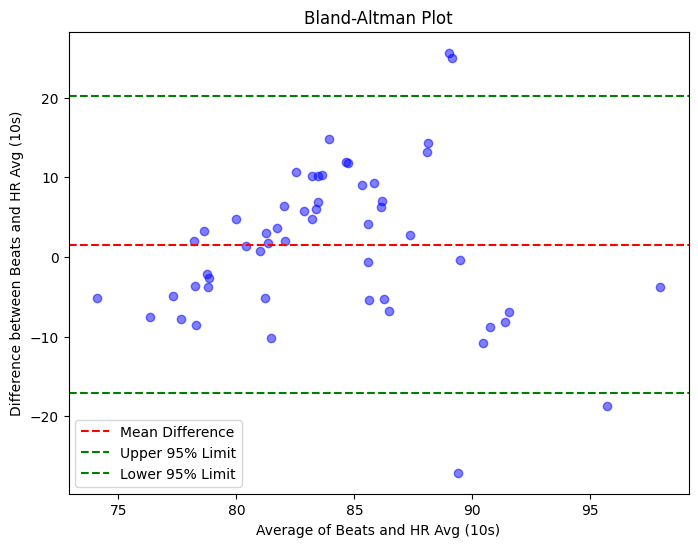

Mean Difference: 1.5433696248075337


In [106]:
import matplotlib.pyplot as plt

# 2. **Bland-Altman Plot**
differences = beats_trimmed - HR
averages = (beats_trimmed + HR) / 2

# Create the Bland-Altman plot
plt.figure(figsize=(8, 6))
plt.scatter(averages, differences, color='blue', alpha=0.5)
plt.axhline(np.mean(differences), color='red', linestyle='--', label='Mean Difference')
plt.axhline(np.mean(differences) + 1.96 * np.std(differences), color='green', linestyle='--', label='Upper 95% Limit')
plt.axhline(np.mean(differences) - 1.96 * np.std(differences), color='green', linestyle='--', label='Lower 95% Limit')
plt.title('Bland-Altman Plot')
plt.xlabel('Average of Beats and HR Avg (10s)')
plt.ylabel('Difference between Beats and HR Avg (10s)')
plt.legend()
plt.show()
print(f'Mean Difference: {np.mean(differences)}')




**3. Pearson Correlation Plot**

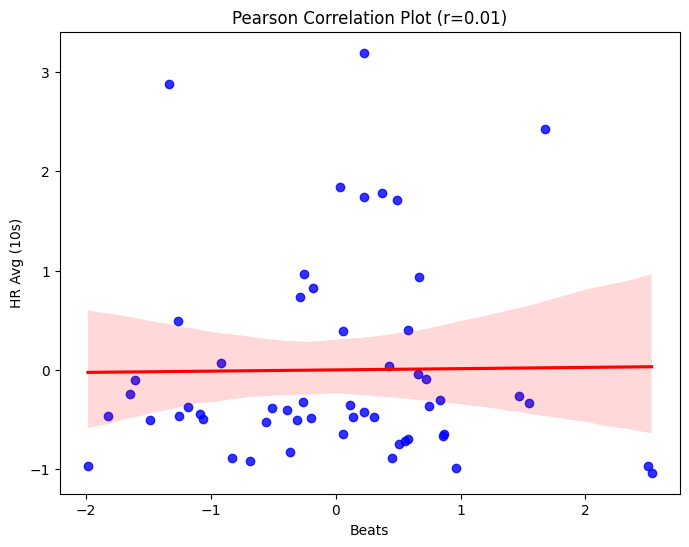

Pearson Correlation: 0.01258328329204952


In [ ]:
from scipy import stats
import seaborn as sns


# 3. **Pearson Correlation Plot**
# Calculate the Pearson correlation coefficient
pearson_corr, _ = stats.pearsonr(beats_trimmed, HR)

# Create the scatter plot for Pearson correlation
plt.figure(figsize=(8, 6))
sns.regplot(x=beats_trimmed, y=HR, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title(f'Pearson Correlation Plot (r={pearson_corr:.2f})')
plt.xlabel('Beats')
plt.ylabel('HR Avg (10s)')
plt.show()


# Output Pearson correlation
print(f'Pearson Correlation: {pearson_corr}')

4. **Boxplot**

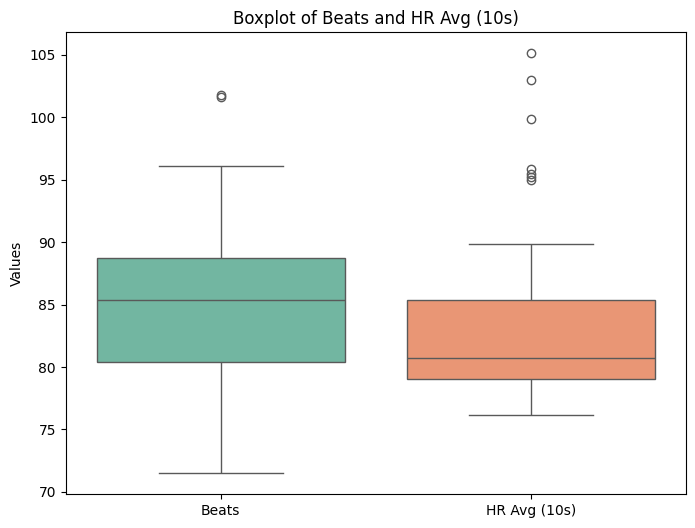

In [99]:
# 4. **Boxplot**
plt.figure(figsize=(8, 6))
sns.boxplot(data=[beats_trimmed, HR], palette="Set2")
plt.xticks([0, 1], ['Beats', 'HR Avg (10s)'])
plt.title('Boxplot of Beats and HR Avg (10s)')
plt.ylabel('Values')
plt.show()